# Solutions 1: Bayesian Inference

In [ ]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize
import ipywidgets as ipyw
from ipywidgets import interact

In [2]:
az.style.use("arviz-darkgrid")
np.random.seed(521)
viridish = [(0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 1.0),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 1.0),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 1.0)]

## 1E1

As we discussed, models are artificial representations used to help define and understand an object or process. However no model is able to perfectly replicate what it represents, and thus is deficient in some way. In this book we focus on a particular type of models, statistical models. What are other types of models you can think of? How do they aid understanding of the thing that is being modeled? How are they deficient?

This is just one possible answer. Use it as a guide.

* A map is a symbolic depiction emphasizing relationships between elements of some space, such as objects, regions, or themes. 

* A map can help to asses how far are we from our destiny, wich route to take or what is the closes gas station.

* A paper map could be outdated, so it may not be able to reflect that a new route exists, which could be shorter or better maintained. Maps only includes some elements which makes then easier to read, for example it could lack elevation information. This could be not important if we are using a car, but become relevant if we bike.

## 1E2. 

Match each of these verbal descriptions to their corresponding mathematical expression:

(a) The probability of a parameter given the the observed data. 

$p(\theta | Y)$, this is call the posterior

(b) The distribution of parameters before seeing any data.

$p(\theta)$, this is call the prior

(c) The plausibility of a the observed data given a parameter value.

$p(Y | \theta )$, this is call the likelihood

(d) The probability of a unseen observation given the observed data

$\int_{\boldsymbol{\Theta}} p(\tilde{\boldsymbol{Y}} \mid \boldsymbol{\theta}) \, p(\boldsymbol{\theta} \mid \boldsymbol{Y}) \, d\boldsymbol{\theta}$, this is call the posterior predictive distribution

(e) The probability of an unseen observation before seeing any data

$\int_{\boldsymbol{\Theta}} p(\boldsymbol{Y^\ast} \mid \boldsymbol{\theta}) \; p(\boldsymbol{\theta}) \; d\boldsymbol{\theta}$, this is call the prior predictive distribution



## 1E3.

From the following expressions, which one corresponds to the sentence, The probability of being sunny given that it is July 9th of 1816?


(a) $p(\text{sunny})$

(b) $p(\text{sunny} \mid \text{July})$

(c) $p(\text{sunny} \mid \text{July 9th of 1816})$

(d) $p(\text{July 9th of 1816} \mid \text{sunny})$

(e) $p(\text{sunny}, \text{July 9th of 1816}) / p(\text{July 9th of 1816})$


The correct answer are **c** and **e**, the last one follows from the definition of conditional probability 

## 1E4.

Show that the probability of choosing a human at random and picking the Pope is not the same as the probability of the Pope being human. In the animated series Futurama, the (Space) Pope is a reptile. How does this change your previous calculations?


Let's assume there are 7.8x10⁸ humans and there is only 1 Pope, Pope Francis, at the time of this writing. If a human is picked at random from the entire human population, the chances of that human being the pope are 1 in 7.8x10⁸.
$$ p(\text{Pope} \mid \text{human}) = \frac{1}{7.8x10⁸} $$

Because Pope are selected among humans. We can assert that given someone is the Pope, there is 100% chance he is a human.

$$ p(\text{human} \mid \text{Pope}) = 1 $$

Regarding the animated series Futurama and the (space) Pope is a reptile. We then have that

$$ p(\text{Pope} \mid \text{human}) = 0 $$

And

$$ p(\text{human} \mid \text{Pope}) = 0 $$

## 1E5.

Sketch what the distribution of possible observed values could be for the following
cases:

(a) The number of people visiting your local cafe assuming Poisson distribution

(b) The weight of adult dogs in kilograms assuming a Uniform distribution

(c) The weight of adult elephants in kilograms assuming Normal distribution

(d) The weight of adult humans in pounds assuming skew Normal distribution

We'll generate "sketches" using scipy for ease of use presentation in this solution manual. Have your students make hand sketches

### Solution A

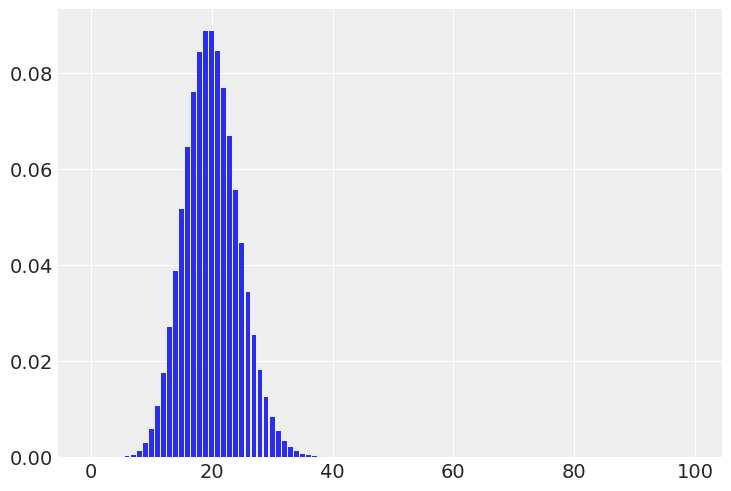

In [3]:
visitors = np.arange(0, 100)
pmf = stats.poisson(20).pmf(visitors)
plt.bar(visitors, pmf);

### Solution B

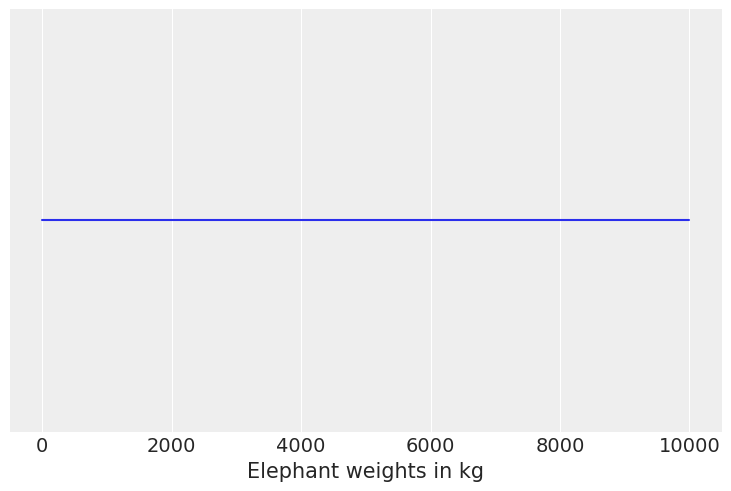

In [4]:
dog_weights = np.linspace(0, 10000)

# We dont need a PDF for thsi one because its a uniform distribution
pdf = np.ones(dog_weights.shape[0])
plt.plot(dog_weights, pdf)
plt.yticks([])
plt.xlabel("Elephant weights in kg");

### Solution C

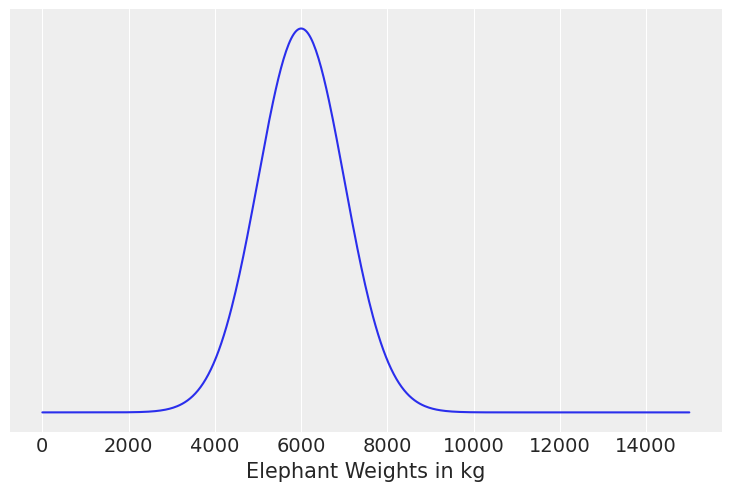

In [5]:
elephant_weights = np.linspace(0, 15000, 500)

pdf = stats.norm(6000, 1000).pdf(elephant_weights)
plt.plot(elephant_weights, pdf)
plt.yticks([])
plt.xlabel("Elephant Weights in kg");

### Solution D

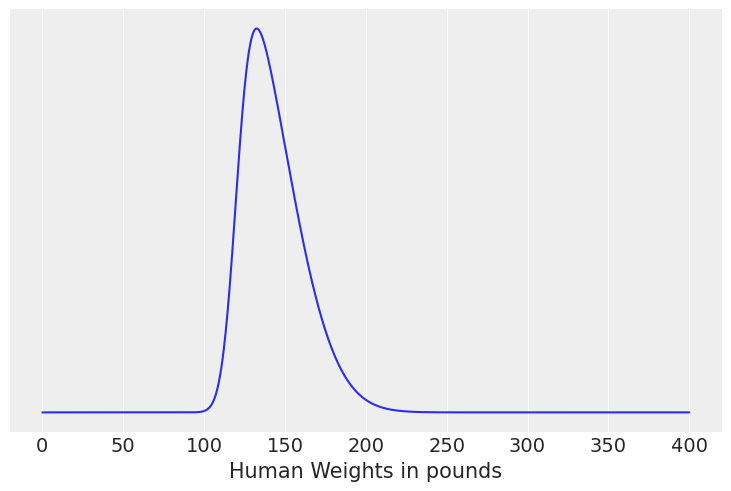

In [6]:
human_weights = np.linspace(0,400, num=1000)

# We dont need a PDF for thsi one because its a uniform distribution
pdf = stats.skewnorm(loc=120, scale=30, a=4).pdf(human_weights)
plt.plot(human_weights, pdf)
plt.yticks([])
plt.xlabel("Human Weights in pounds");

## 1E6. 

For each example in the previous exercise use SciPy to specify the distribution in
Python. Pick parameters that you believe are reasonable, take a random sample of size
1000, and plot the resulting distribution. Does this distribution look reasonable given your
domain knowledge? If not adjust the parameters and repeat the process until they seem
reasonable.

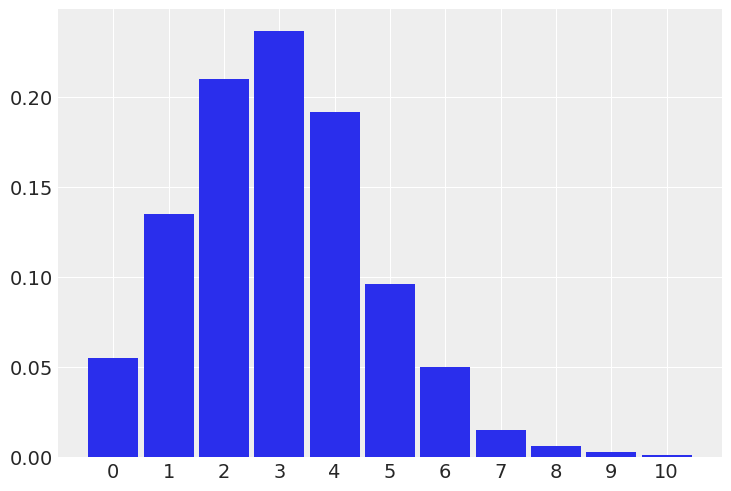

In [7]:
# (a) The number of people visiting your local cafe assuming Poisson distribution

p = stats.poisson(3).rvs(1000)
az.plot_dist(p);

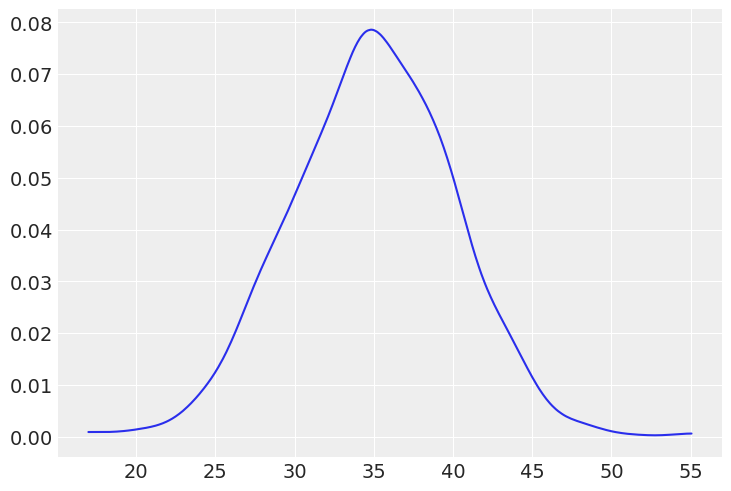

In [8]:
#(b) The weight of dogs assuming Normal distribution (in kilograms for a medium size dog)

dw = stats.norm(35, 5).rvs(1000)
az.plot_dist(dw);

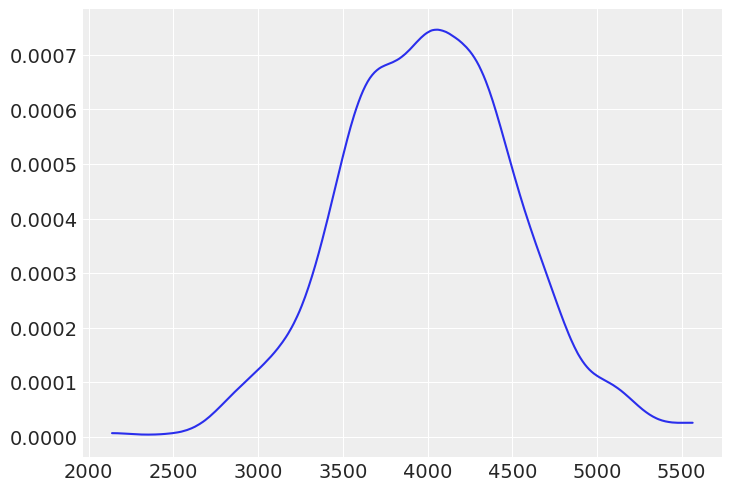

In [9]:
# (c) The weight of elephants assuming Normal distribution (in kilograms, assuming Asian elephants)

dw = stats.norm(4000, 500).rvs(1000)
az.plot_dist(dw);

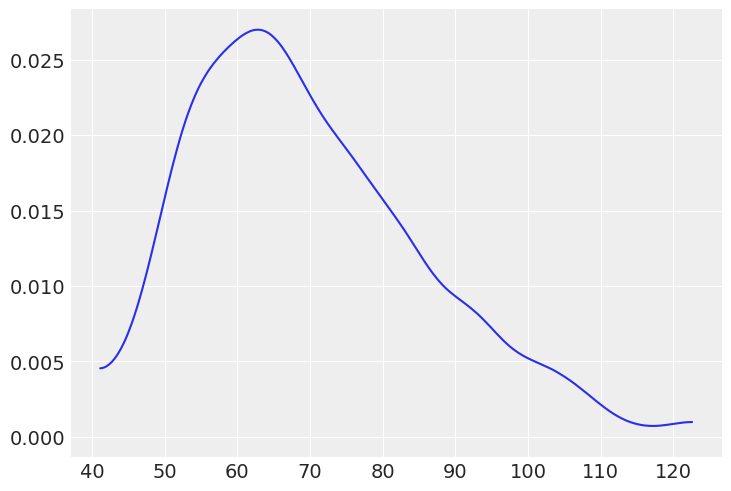

In [10]:
# (d) The weight of people assuming skew Normal distribution (in kilogram assuming females)


dw = stats.skewnorm(5, 50, 25).rvs(1000)
az.plot_dist(dw);

## 1E7.

Compare priors Beta(0.5, 0.5), Beta(1, 1), Beta(1, 4). How do the priors differ in terms
of shape?

Beta(0.5, 0.5) is U-like shaped

Beta(1, 1) is Uniform

Beta(1, 4) is exponential-like shaped

All the shapes generated by a Beta distribution (not just these 3 examples) are restricted to the $[0, 1]$ interval.

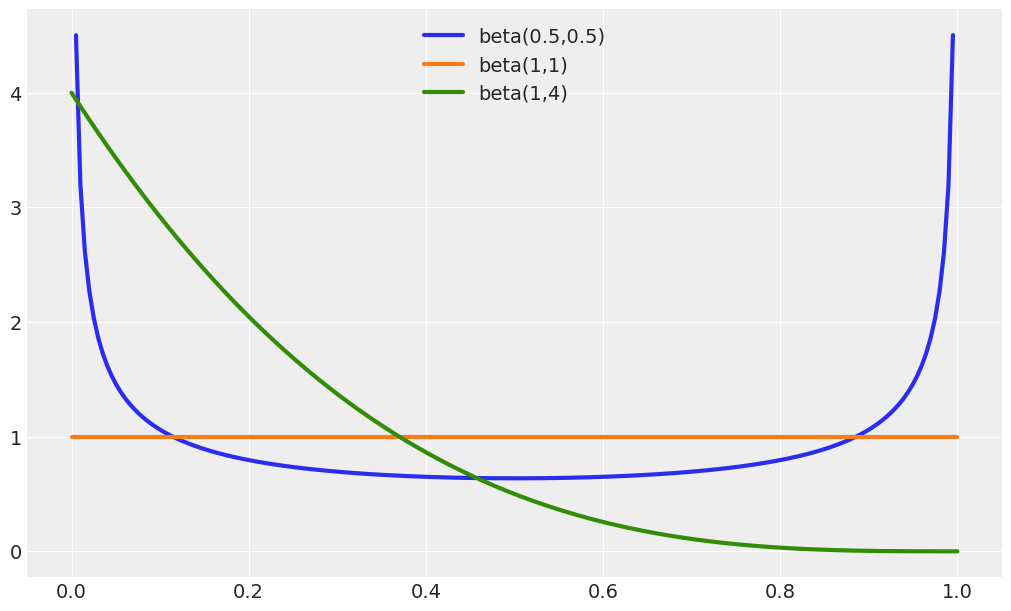

In [11]:
_, ax = plt.subplots(1, figsize=(10, 6))
params = [(0.5, 0.5), (1, 1), (1, 4)]
x = np.linspace(0, 1, 200)
for a, b in params:
    beta = stats.beta(a, b)
    ax.plot(x, beta.pdf(x), label=f"beta({a},{b})", lw=3)
ax.legend(loc=9);

## 1E8.

Rerun Code block 1.8 but using two Beta-priors of your choice Hint: you may want
to try priors with $\alpha \not = \beta$ like Beta(2, 5).

<ipython-input-12-e6f30df6d6c3>:15: RuntimeWarning: invalid value encountered in true_divide
  axes[idx].plot(np.divide(y, N), 0, color="k", marker="o", ms=12)
<ipython-input-12-e6f30df6d6c3>:15: RuntimeWarning: invalid value encountered in true_divide
  axes[idx].plot(np.divide(y, N), 0, color="k", marker="o", ms=12)


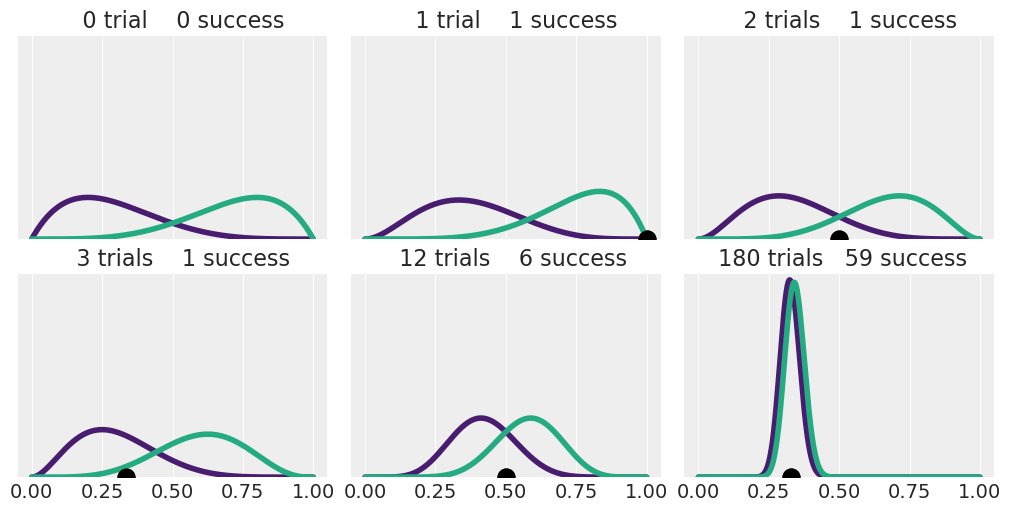

In [12]:
_, axes = plt.subplots(2,3, figsize=(10, 5), sharey=True, sharex=True)
axes = np.ravel(axes)
n_trials = [0, 1, 2, 3, 12, 180]
success = [0, 1, 1, 1, 6, 59]
data = zip (n_trials, success)
beta_params = [(2, 5), (5, 2)]
θ = np.linspace(0, 1, 1500)
for idx, (N, y) in enumerate (data):
    s_n = ("s" if (N > 1) else "")
    for jdx, (a_prior, b_prior) in enumerate (beta_params):
        p_theta_given_y = stats.beta.pdf(θ, a_prior + y, b_prior + N - y)
        axes[idx].plot(θ, p_theta_given_y, lw=4, color=viridish[jdx])
        axes[idx].set_yticks([])
        axes[idx].set_ylim(0, 12)
        axes[idx].plot(np.divide(y, N), 0, color="k", marker="o", ms=12)
        axes[idx].set_title(f"{N:4d} trial{s_n} {y:4d} success")

## 1E9.

Try to come up with new constraints in order to obtain new Max-Ent distributions (Code Block 1.9)

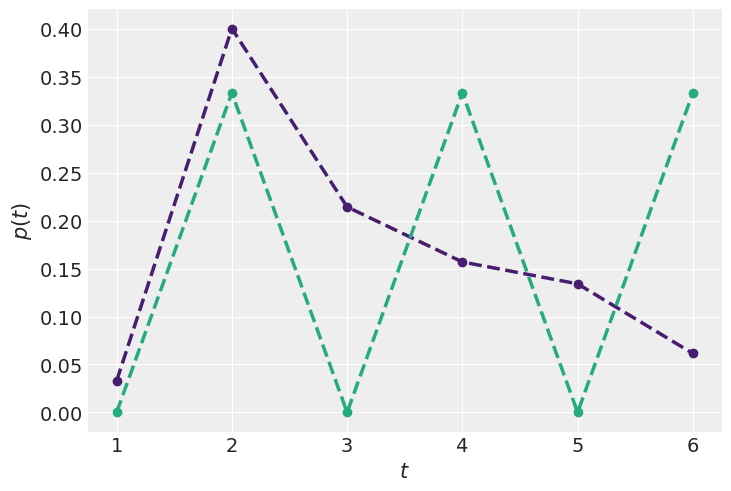

In [13]:
cons = [[{"type": "eq", "fun": lambda x: np.sum(x) - 1},
         {"type": "eq", "fun": lambda x: 1-np.sum(x * [-2, 2, 1, 0.5, 0.25, -1])}],
        [{"type": "eq", "fun": lambda x: np.sum(x) - 1},
         {"type": "eq", "fun": lambda x: np.sum(x * [1, 0, 1, 0, 1,0])}]]

max_ent = []
_, ax = plt.subplots(1)
for i, c in enumerate(cons):
    val = minimize(lambda x: -stats.entropy(x), x0=[1/6]*6, bounds=[(0., 1.)] * 6,
                   constraints=c)['x']
    max_ent.append(stats.entropy(val))
    ax.plot(np.arange(1, 7), val, 'o--', color=viridish[i], lw=2.5)
ax.set_xlabel("$t$")
ax.set_ylabel("$p(t)$");

## 1E10.

In Code Block 1.3, change the value of `can_sd` and run the Metropolis-Hastings
sampler. Try values like 0.01 and 1.


(a) Compute the mean, sd and HDI and compare the values with those in the book
(computed using `can_sd=0.05`). How different are the estimates?

(b) Use the function az.plot_posterior.

In [14]:
def post(θ, Y, α=1, β=1):
    if 0 <= θ <= 1:
        prior = stats.beta(α, β).pdf(θ)
        like = stats.bernoulli(θ).pmf(Y).prod()
        prob = like * prior
    else:
        prob = -np.inf
    return prob


Y = stats.bernoulli(0.7).rvs(20)

In [15]:
def mcmc(can_sd=0.05):
    n_iters = 1000
    α = β = 1
    θ = 0.5
    trace = {"θ":np.zeros(n_iters)}
    p2 = post(θ, Y, α, β)
    for iter in range (n_iters):
        θ_can = stats.norm(θ, can_sd).rvs(1)
        p1 = post(θ_can, Y, α, β)
        pa = p1 / p2
        if pa > stats.uniform(0, 1).rvs(1):
            θ = θ_can
            p2 = p1
        trace["θ"][ iter ] = θ
    return trace

In [16]:
traces = []
sds = [0.05, 0.001, 1]
for can_sd in sds:
    traces.append(mcmc(can_sd))

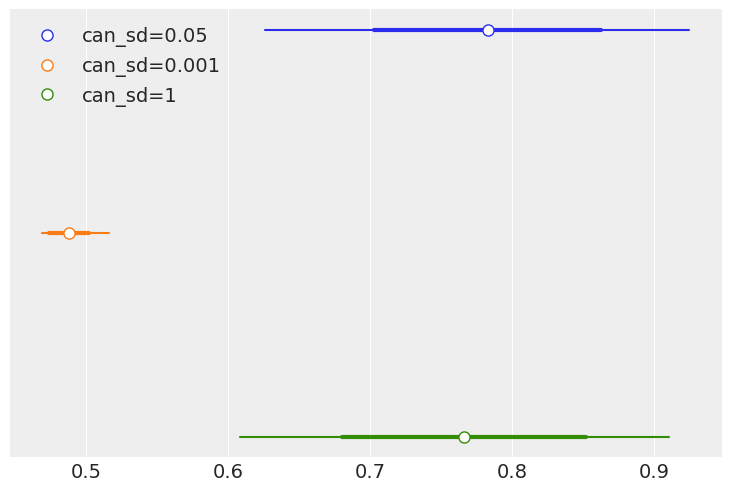

In [17]:
_, ax = plt.subplots(1)
for idx, trace in enumerate(traces):
    df = az.summary(trace, kind="stats")
    mean = df["mean"]
    sd = df["sd"]
    hdi = df.iloc[0,2:].values
    ax.plot([hdi[0], hdi[1]], [-idx, -idx],  f"C{idx}-")
    ax.plot([mean-sd, mean+sd], [-idx, -idx],  f"C{idx}-", lw=3)
    ax.plot(mean, -idx, "o", ms=8, mec=f"C{idx}", mfc="w", label=f"can_sd={sds[idx]}")
ax.set_yticks([]);
plt.legend();

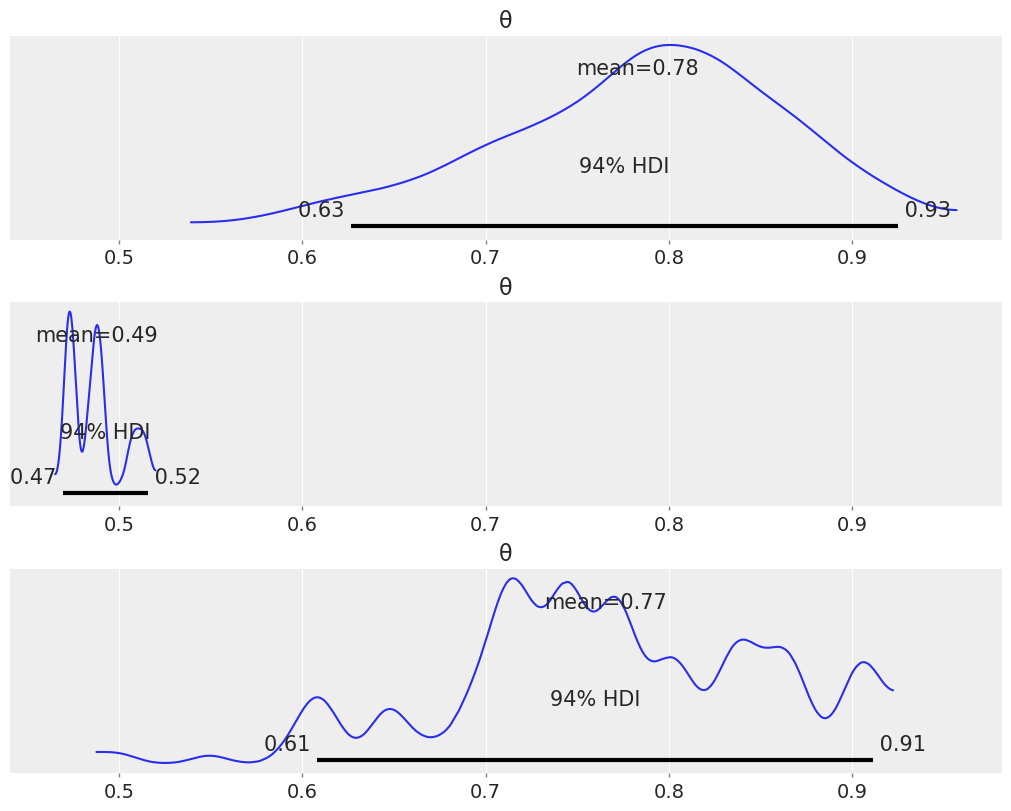

In [18]:
_, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
for trace, ax in zip(traces, axes.ravel()):
    az.plot_posterior(trace, ax=ax)

## 1E11.

You need to estimate the weights of blue whales, humans and mice. You assume
they are normally distributed and you set the same prior HN (200kg) for the variance.

What type of prior is this for adult blue whales? Strongly informative, weakly informative, or non informative.

**Strongly Informative, as more than the 99% of the mass of the distribution is between 0 and 600 kg and blue whales weight more than 130000 kilograms**


What about for mice and for humans?

**non informative for mice, the distribution is virtually flat for the entire range of plausible mice weights. Although we could also argue that there is actually some information  as we are excluding negative values**


**weakly informative for humans, as we are excluding negatives values and making weight above 400 kilograms rare**

How does informativeness of the prior correspond to our real world intuitions about these animals?

** As noted in the example above we use "common knowledge" as an indication for our priors. We know mice and humans typically weigh grams and sub 200 kg typically. We also know that whales are very large. So even though the prior distribution is exactly the same, the informativeness of the prior differs for different problems, as the informativeness of a prior is a function of our real world knowledge for a given problem.

## 1E12.

Use the following function to explore different combinations of priors (change the
parameters a and b) and data (change heads and trials). Summarize your observations.

<function __main__.posterior_grid(grid=10, a=1, b=1, heads=6, trials=9)>

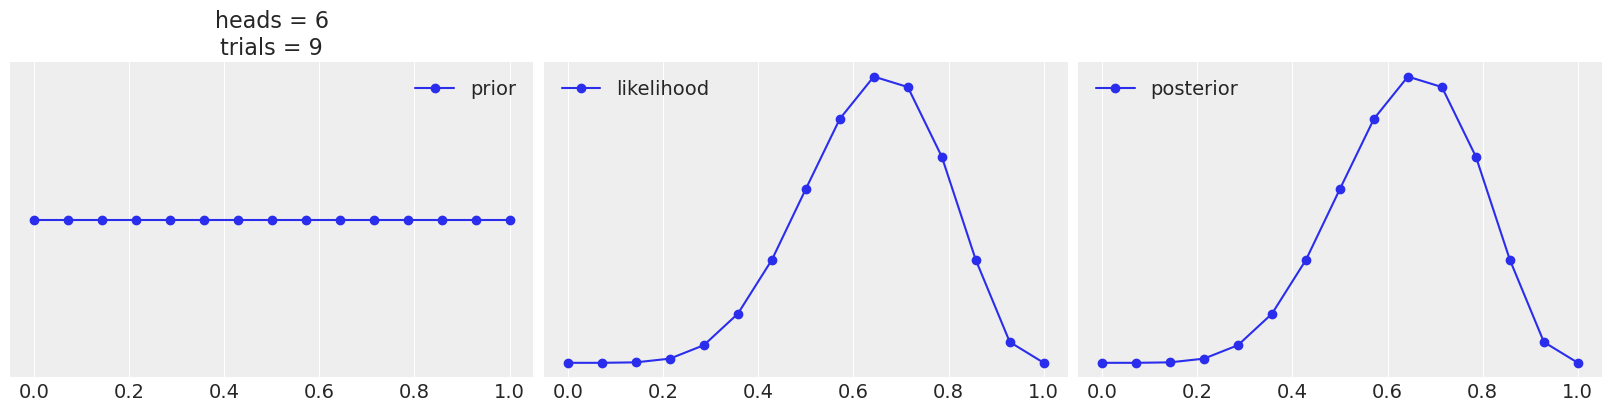

In [19]:
def posterior_grid(grid=10, a=1, b=1, heads=6, trials=9):
    grid = np.linspace(0, 1, grid)
    prior = stats.beta(a, b).pdf(grid)
    likelihood = stats.binom.pmf(heads, trials, grid)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    _, ax = plt.subplots(1, 3, sharex=True, figsize=(16, 4))
    ax[0].set_title(f"heads = {heads}\ntrials = {trials}")
    for i, (e, e_n) in enumerate(zip(
            [prior, likelihood, posterior],
            ["prior", "likelihood", "posterior"])):
        ax[i].set_yticks([])
        ax[i].plot(grid, e, "o-", label=e_n)
        ax[i].legend(fontsize=14)


interact(posterior_grid,
    grid=ipyw.IntSlider(min=2, max=100, step=1, value=15),
    a=ipyw.FloatSlider(min=1, max=7, step=1, value=1),
    b=ipyw.FloatSlider(min=1, max=7, step=1, value=1),
    heads=ipyw.IntSlider(min=0, max=20, step=1, value=6),
    trials=ipyw.IntSlider(min=0, max=20, step=1, value=9))

## 1E13.

Between the prior, prior predictive, posterior, and posterior predictive distributions
which distribution would help answer each of these questions scenarios. Some items may have multiple
answers.

(a) How do we think is the distribution of parameters values before seeing any data?

(b) What observed values do we think we could see before seeing any data?

(c) After estimating parameters using a model what do we predict we will observe next?

(d) What parameter values explain the observed data after conditioning on that data?

(e) Which can be used to calculate numerical summaries, such as the mean, of the parameters?

(f) Which can can be used to visualize a Highest Density Interval?

### Solution A
Prior distribution

### Solution B
Prior predictive distribution

### Solution C
Posterior predictive distribution

### Solution D
Posterior distribution

### Solution E
Prior or Posteriors distribution. Both can represent our information about parameters so they can be used to calculate numerical summaries of parameters. The difference is whether those summaries represent information prior to conditioning on data or afterwards.

### Solution F
A HDI can be calculated from any distribution, but the meaning will differ depending on what kind of distribution it is

## 1M14.

Equation 1.1 contains the marginal likelihood in the denominator which is difficult
to calculate. In Equation 1.3 we show that knowing the posterior up to a proportional
constant is sufficient for inference. Show why the marginal likelihood is not needed for the
Metropolis-Hastings method to work. Hint: this is a pen and paper exercise, try by expanding
Equation 1.9.

Restating the Metropolis-Hastings aceptance criterion here

$$
p_a (x_{i + 1} \mid x_i) = \min \left (1, \frac{p(x_{i + 1}) \; 
q(x_i \mid x_{i + 1})} {p(x_i) \; q (x_{i + 1} \mid x_i)} \right)
$$

If we ignore $q$ because is independent of the posterior we just need to compute a ratio of posteriors

$$
\frac{p(x_{i + 1})} {p(x_i)}
$$

And restating the full version of Bayes' theorem

$$
 \underbrace{p(\boldsymbol{x} \mid \boldsymbol{Y})}_{\text{posterior}} = \frac{\overbrace{p(\boldsymbol{Y} \mid \boldsymbol{x})}^{\text{likelihood}}\; \overbrace{p(\boldsymbol{x})}^{\text{prior}}}{\underbrace{{p(\boldsymbol{Y})}}_{\text{marginal likelihood}}}
 $$

We get that this ratio can be written as:

$$
\frac{p(x_{i+1} \mid Y)}{p(x_i \mid Y)} = \frac{\frac{p(Y \mid x_{i+1}) p(x_{i+1})} {p(Y)}}{\frac{p(Y \mid x_i) p(x_i)} {p(Y)}}
$$

We can see that the denonimator $p(\boldsymbol{Y})$ cancels out 

## 1M15. 

In the following definition of a probabilistic model, identify the prior, the likelihood and the posterior:

\begin{equation*}
\begin{split}
Y \sim \mathcal{N}(\mu, \sigma) \text{ Likelihood}\\
\mu \sim \mathcal{N}(0, 1) \text{ Prior}\\
\sigma \sim \mathcal{HN}(1) \text{ Prior}\\
\end{split}
\end{equation*}

The posterior is not represented here as the posterior is the result of conditioning the model to the data

## 1M16.

In the previous model, how many parameters will the posterior have? Compare your
answer with that from the model in the coin-flipping problem in Equation 1.10.


The posteriors will be bidimensional, as is representing the joint distribution of $\mu$ and $\sigma$. In the coin-flipping problem we only have one parameter, $\theta$.

## 1M17.

Suppose that we have two coins; when we toss the first coin, half of the time it lands
tails and half of the time on heads. The other coin is a loaded coin that always lands on
heads. If we choose one of the coins at random and observe a head, what is the probability
that this coin is the loaded one?

The trick of this problem is correctly identifying the posterior term which is

$$ P(\text{loaded coin} \mid \text{heads})$$

from there we can apply the basic version of Bayes formula

$$ P(\text{loaded coin} \mid \text{heads}) = \frac{p(\text{heads} \mid \text{loaded coin}) \; p(\text{loaded coin})}{p(\text{head})} $$

From here we can substitute in the following values

$$
p(\text{heads} \mid \text{loaded coin}) = 1 \text{ Because we always get heads with our loaded coin} \\
p(\text{loaded coin}) = .5 \text{ Because we randomly pick between coins} \\
p(\text{heads}) = p(\text{heads} \mid \text{fair coin})*p(\text{fair coin}) + p(\text{heads} \mid \text{loaded coin})*p(\text{fair coin}) \\ 
= .5*5 + 1*.5 \text{ Because of law of total probability} 
$$

plugging this all in we get

In [20]:
(1*.5)/(.5*.5 + 1*.5)

0.6666666666666666

## 1M18

Modify Code Block 1.2 to generate random samples from a Poisson distribution with a parameter of your choosing.

Then modify Code Blocks 1.1 and 1.3 to generate MCMC samples and see if you can recover your chosen parameter. Test how the number of samples, MCMC iterations, and initial starting point affect convergence to your true chosen parameter.

In [21]:
rng = np.random.default_rng(12345)

Y = stats.poisson(5).rvs(20, random_state=rng)
Y

array([ 5,  7,  6,  4,  2, 11,  5,  1,  4,  3,  4,  4,  6,  4,  4,  5,  7,
        4,  5,  4])

In [22]:
def post(lam, Y, σ=200):
    if 0 <= lam:
        # Set a half normal prior
        prior = stats.halfnorm(scale=σ).pdf(lam)
        like  = stats.poisson(lam).pmf(Y).prod()
        prop = like * prior
    else:
        prop = -np.inf
    return prop

# Test one value of lambda
possible_lambda_value = 5
post(possible_lambda_value, Y)

2.6013490066852025e-21

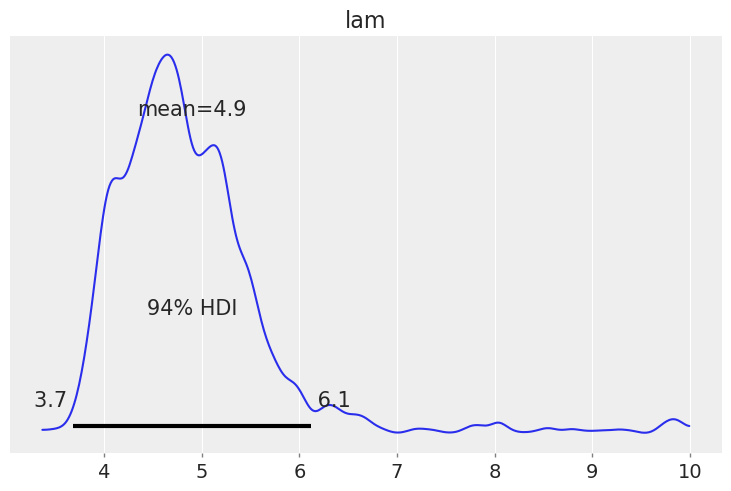

In [23]:
n_iters = 10000
can_sd = 0.05
lam = 10 
trace = {'lam':np.zeros(n_iters)}
p2 = post(lam, Y)

for iter in range(n_iters):
    lam_can = stats.norm(lam, can_sd).rvs(1)
    p1 = post(lam_can, Y)  
    pa = p1 / p2

    if pa > stats.uniform(0, 1).rvs(1):
        lam = lam_can
        p2 = p1

    trace['lam'][iter] = lam
az.plot_posterior(trace);

## 1H19.

Assume we are building a model to estimate the mean and standard deviation of adult human heights in centimeters. Build a model that will make this estimation. Start with Code Block 1.6  and change the likelihood and priors as needed. After doing so

(a) Sample from the prior predictive. Generate a visualization and numerical summary of the prior predictive distribution.

(b) Using the outputs from (a) justify your choices of priors and likelihoods

In [24]:
# Declare a model in PyMC3

with pm.Model() as model:
    # Specify the prior distribution of unknown parameters
    σ = pm.HalfNormal("σ", sd=50)
    μ = pm.Normal("μ", mu = 150, sd=30)

    # Specify the likelihood distribution.
    # Because we are not conditioned on data we can pass an empty list to the "observed" argument
    y_obs = pm.TruncatedNormal("heights", mu=μ, sd=σ, lower=0, observed=[])
    
    # Sample from the posterior distribution
    prior_predictive = pm.sample_prior_predictive()

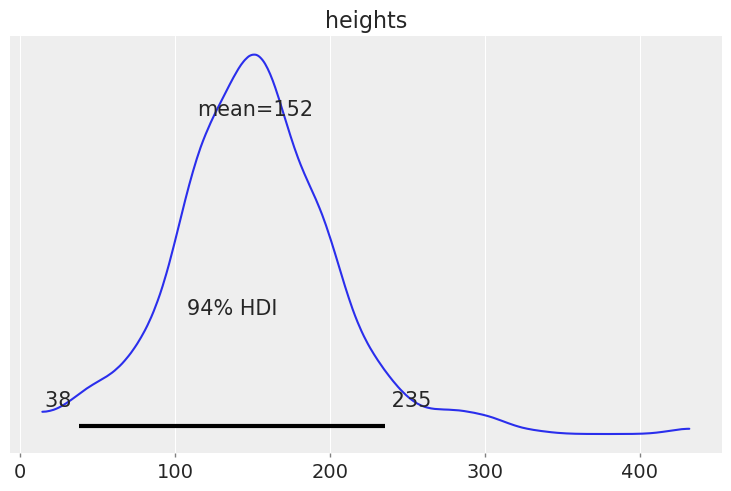

In [25]:
az.plot_posterior(prior_predictive, var_names=["heights"]);

## 1M20.


From domain knowledge you have that a given parameter can not be negative, and has a mean that is roughly between 3 and 10 units, and a standard deviation of around 2. Determine two prior distributions that satisfy these constraints using Python. This may require trial and error by drawing samples and verifying these criteria have been met using both plots and numerical summaries.

(array(6.5), 2.2453655975512463)

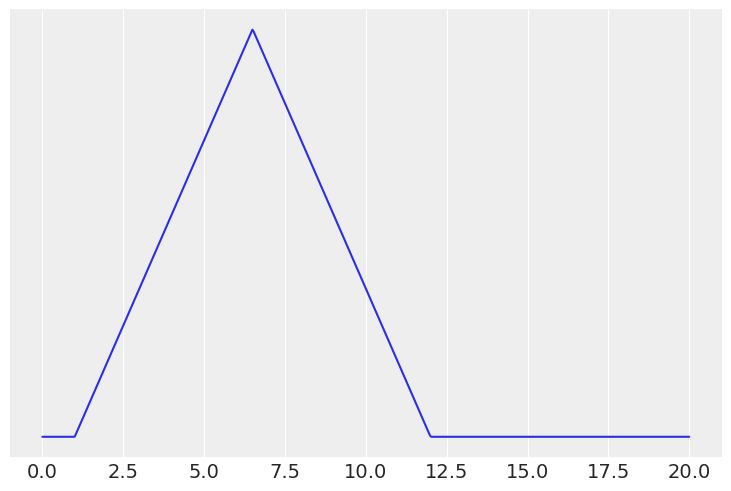

In [26]:
# Triangular distribution
x = np.linspace(0, 20, 500)
prior = stats.triang(c=0.5, loc=1, scale=11)
plt.plot(x, prior.pdf(x))
plt.yticks([])
mean, var = prior.stats()
mean, var**0.5,

(array(5.88235294), 2.147931598059475, array([4.30765895, 7.28479991]))

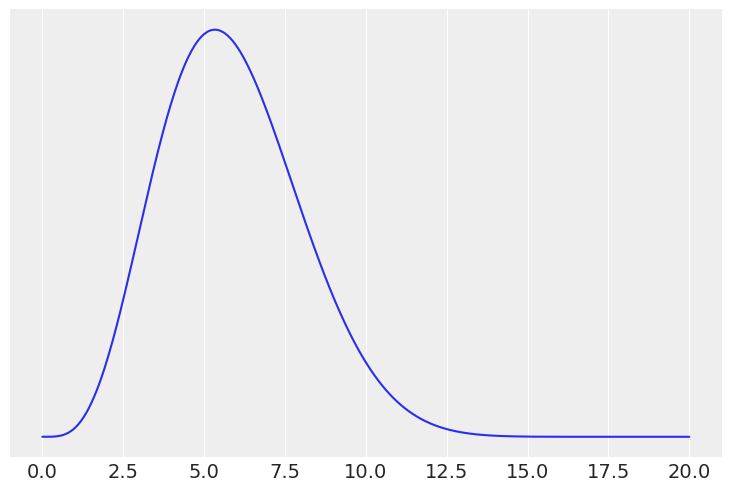

In [27]:
# scaled beta
x = np.linspace(0, 20, 500)
prior = stats.beta(5, 12, loc=0, scale=20)
plt.plot(x, prior.pdf(x))
plt.yticks([])
mean, var = prior.stats()
mean, var**0.5, prior.ppf([0.25, 0.75])

(array(6.5), 2.0554804791094465, array([5.0218264 , 7.74399991]))

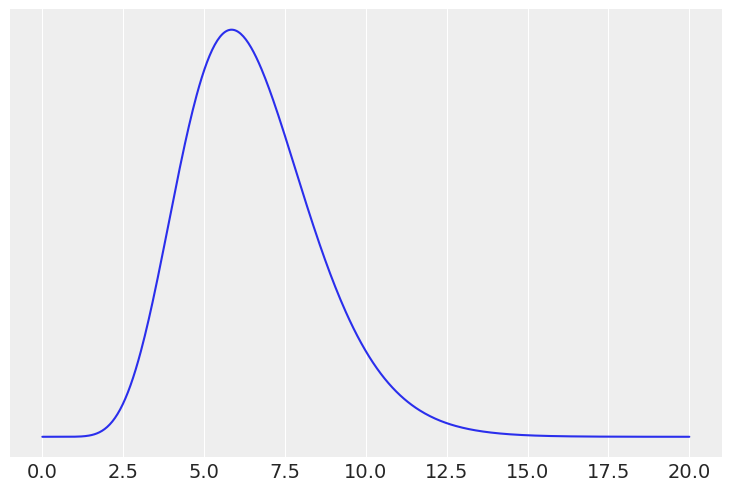

In [28]:
# Gamma
x = np.linspace(0, 20, 500)
prior = stats.gamma(10, scale=0.65)
plt.plot(x, prior.pdf(x))
plt.yticks([])
mean, var = prior.stats()
mean, var**0.5, prior.ppf([0.25, 0.75])

## 1M21.

A store is visited by n customers on a given day. The number of customers that
make a purchase Y is distributed as Bin(n, θ) where θ is the probability that a customer
makes a purchase. Assume we know θ and the prior for n is Pois(4.5).

Use PyMC3 to compute the posterior distribution of n for all combinations of Y ∈ 0, 5, 10
and θ ∈ 0.2, 0.5. Use az.plot_posterior to plot the results in a single plot.

Summarize the effect of Y and θ on the posterior

In [29]:
ys = [0, np.ones(5), np.ones(10)]
θs = [0.2, 0.5]
traces = []
params = []
for θ in θs:
    for y in ys:
        with pm.Model() as model:
            n = pm.Poisson("n", 4.5)
            Y = pm.Binomial("Y", n, θ, observed=y)
            trace = pm.sample()
            traces.append(trace)
            params.append((y, θ))

<ipython-input-29-8882123ced4e>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample()
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.
<ipython-input-29-8882123ced4e>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample()
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.
<ipython-input-29-8882123ced4e>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample()
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.
<ipython-input-29-8882123ced4e>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample()
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.
<ipython-input-29-8882123ced4e>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample()
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.
<ipython-input-29-8882123ced4e>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample()
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


/u/32/martino5/unix/anaconda3/envs/pymcv3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/u/32/martino5/unix/anaconda3/envs/pymcv3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/u/32/martino5/unix/anaconda3/envs/pymcv3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the mode

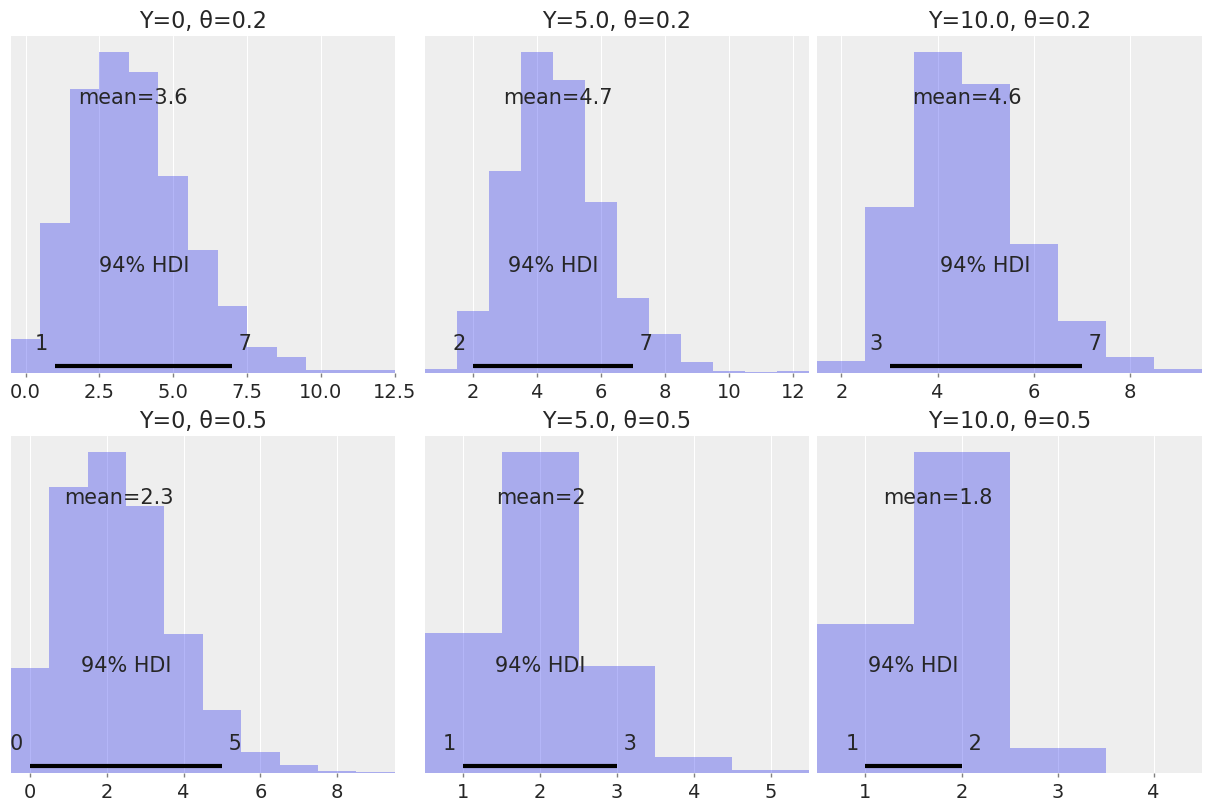

In [30]:
_, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

for trace, ax, param in zip(traces, axes, params):
    az.plot_posterior(trace, ax=ax)
    ax.set_title(f"Y={np.sum(param[0])}, θ={param[1]}")

## 1H22.

Modify Code Block 1.2 to generate samples from a Normal Distribution, noting your choice of parameters for the mean and standard deviation. Then modify Code Blocks 1.1 and 1.3 to sample from a Normal model and see if you can recover your chosen parameters.

In [31]:
mean, sd = 10, 3
rng = np.random.default_rng(12345)

Y = stats.norm(loc=mean, scale=sd).rvs(20, random_state=rng)


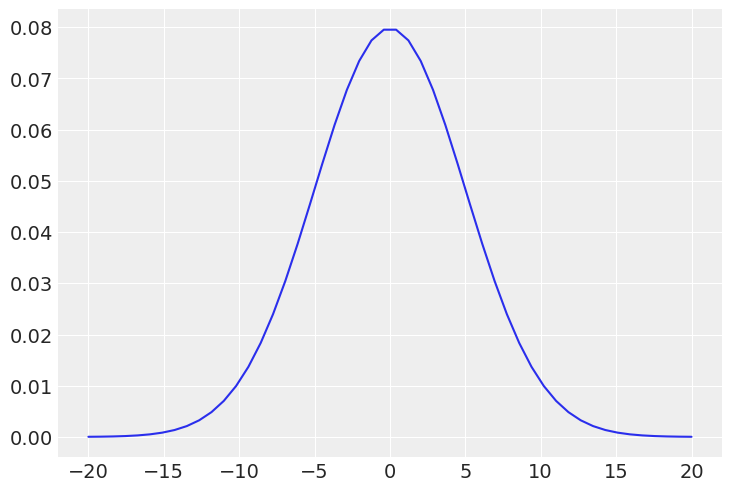

In [32]:
x = np.linspace(-20, 20)
plt.plot(x, stats.norm(0, 5).pdf(x))

In [33]:
def post(mean, sd, Y):
    # Scale cannot be negative
    if 0 <= sd:
        # Set a half normal prior for the standard deviation
        sd_prior = stats.halfnorm(scale=5).pdf(sd)
        
        # Set a normal prior for the mean
        mean_prior = stats.norm(0, 5).pdf(mean)
        
        # compute the likelihood
        like = stats.norm(mean, sd).pdf(Y).prod()
        prop = like * sd_prior * mean_prior
        
    else:
        prop = -np.inf
    return prop

In [34]:
n_iters = 10000
can_sd = 0.5

# Initialization points for each parameter
mean = 2
sd = 10 

trace = {'mean':np.zeros(n_iters), 'sd':np.zeros(n_iters)}
p2 = post(mean, sd, Y)

for iter in range(n_iters):
    mean_can = stats.norm(mean, can_sd).rvs(1)
    sd_can = stats.norm(sd, can_sd).rvs(1)

    p1 = post(mean_can, sd_can, Y)  
    pa = p1 / p2

    if pa > stats.uniform(0, 1).rvs(1):
        mean = mean_can
        sd = sd_can
        p2 = p1

    trace['mean'][iter] = mean
    trace['sd'][iter] = sd

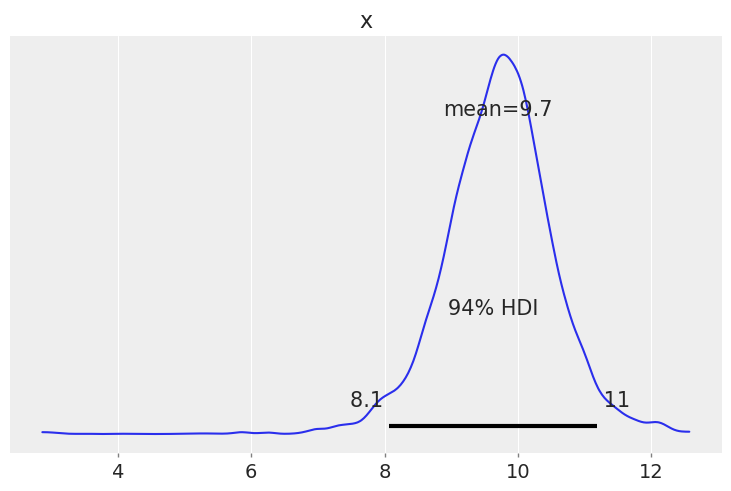

In [35]:
az.plot_posterior(trace["mean"]);

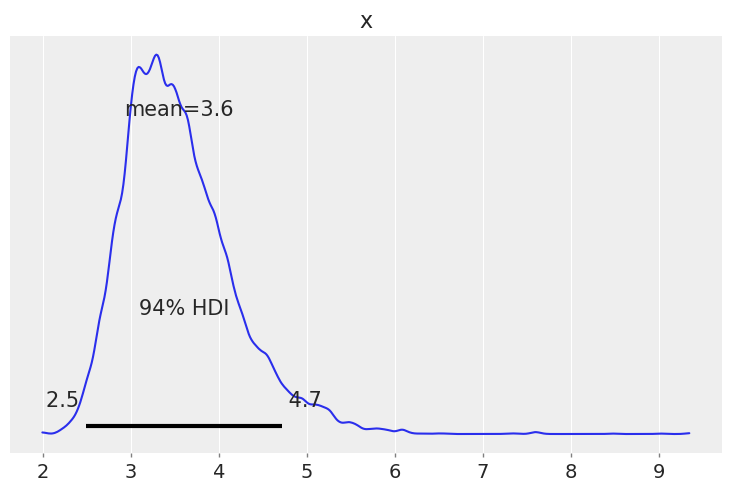

In [36]:
az.plot_posterior(trace["sd"]);

## 1H23.
Make a model that estimates the proportion of the number of sunny versus cloudy days in your area. Use the past 5 days of data from your personal observations. Think through the data collection process. How hard is it to remember the past 5 days. What if needed the past 30 days of data? Past year? Justify your choice of priors. Obtain a posterior distribution that estimates the proportion of sunny versus cloudy days. Generate predictions for the next 10 days of weather. Communicate your answer using both numerical summaries and visualizations.

In [37]:
# Weather from one of the authors 0 is sunny, 1 is cloudly
weather_obs = [0, 1, 1, 0, 1]

with pm.Model() as model:
    # Specify the prior distribution of unknown parameter
    θ = pm.Beta("θ", alpha=1, beta=1)
    
    # Specify the likelihood distribution and condition on the observed data
    y_obs = pm.Binomial("y_obs", n=5, p=θ, observed=weather_obs)
    
    # Sample from the posterior distribution
    trace = pm.sample(1000, return_inferencedata=True)
    post_pred = pm.sample_posterior_predictive(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


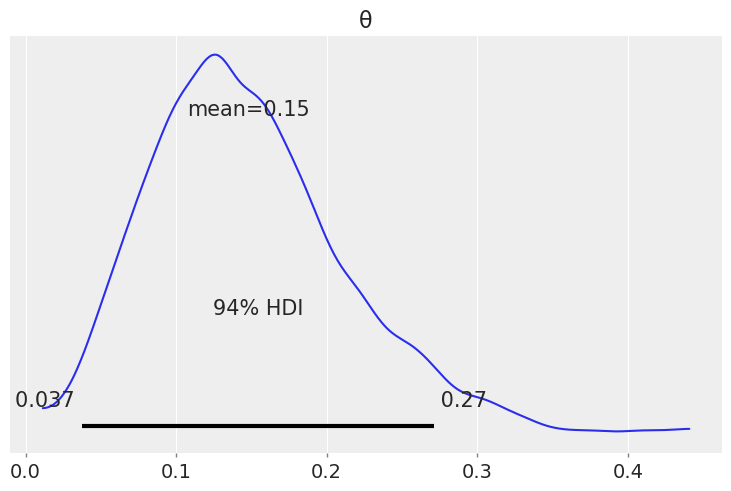

In [38]:
# Posterior distribution of sunny weather
az.plot_posterior(trace);

In [39]:
# In this case because each day is assumed to independent and there are no covariates we can take 10 random samples from the posterior predictive
# This will not be the case in later chapters such as regression where the expected posterior values are dependent on covariates
post_pred["y_obs"][:2].reshape(-1)

array([0, 1, 0, 0, 0, 0, 2, 1, 0, 0])

## 1H24.

You planted 12 seedlings and 3 germinate. Let us call θ the probability that a seedling
germinates. Assuming Beta(1, 1) prior distribution for θ.

(a) Use pen and paper to compute the posterior mean and standard deviation. Verify your calculation using SciPy

(b) Use SciPy to compute the equal-tailed and highest density 94% posterior intervals.

(c) Use SciPy to compute the posterior predictive probability that at least one seedling will germinate if you plant another 12 seedlings.


After obtaining your results with SciPy repeat this exercise using PyMC3 and ArviZ

### Solution A

In [40]:
# Use a conjugate update to determine new posterior
num_germinate = 3
num_did_not_germinate = 9

post_beta_a = 1+3
post_beta_b = 1+9


mean = post_beta_a / (post_beta_a+post_beta_b)
var = (post_beta_a * post_beta_b)/((post_beta_a+post_beta_b)**2*(post_beta_a+post_beta_b +1))
mean, var**0.5

(0.2857142857142857, 0.11664236870396086)

In [41]:
# We can also verify the above numbers using scipy
mean, var = stats.beta(post_beta_a, post_beta_b).stats(moments='mv')
mean, var**0.5

(array(0.28571429), 0.11664236870396086)

### Solution B

In [42]:
post = stats.beta(post_beta_a, post_beta_b)
eti = (post.ppf(0.03), post.ppf(0.97))
print(f"{eti[0]:.3f}, {eti[1]:.3f}")

0.096, 0.527


In [43]:
# generate a grid of values
x = np.linspace(0, 1, 1000)
# evaluate the distribution at those grid values
pdf = stats.beta(post_beta_a, post_beta_b).pdf(x)
# normalize the pdf
pdf = pdf/pdf.sum()
# get the index that sort the pdf from highest to lowest density 
idx = pdf.argsort()[::-1]

# We now accumulate the density until we reach the target value
# we also store the values of x corresponding to those accumulated densities
target_density = 0.94
cumulative = 0
xs_in_the_HDI = []
for i in idx:
    cumulative += pdf[i]
    if cumulative > target_density:
        break
    else:
        xs_in_the_HDI.append(x[i])

# These are the boundaries of our numerically approximated HDI
print(f"{min(xs_in_the_HDI):.3f}, {max(xs_in_the_HDI):.3f}")

0.080, 0.503


### Solution C

In [44]:
samples = 10000
probs = stats.beta(post_beta_a, post_beta_b).rvs(samples)

posterior_predictive_seedlings = stats.binom(p=probs, n=12).rvs()

prob_at_least_one = np.mean(posterior_predictive_seedlings >= 1)
prob_at_least_one

0.9441

We can also compute the posterior predictive probability in one step using the betabinomial distribution

In [45]:
x = np.arange(0, 20)
pmf = stats.betabinom(12, post_beta_a, post_beta_b).pmf(x)
pmf[1:].sum()

0.9434782608695651

In [46]:
seedlings = np.repeat([0, 1], [9, 3])
# Declare a model in PyMC3
with pm.Model() as model:
    # Specify the prior distribution of unknown parameter
    θ = pm.Beta("θ", alpha=1, beta=1)
    # Specify the likelihood distribution and condition on the observed data
    y_obs = pm.Binomial("y_obs", n=1, p=θ, observed=seedlings)
    # Sample from the posterior distribution
    idata = pm.sample(1000, return_inferencedata=True)
    post_pred = pm.sample_posterior_predictive(idata)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [47]:
az.summary(idata)[["mean", "sd"]]

,mean,sd
θ,0.288,0.116


In [48]:
idata.posterior["θ"].quantile([0.03, 0.97])

<xarray.DataArray 'θ' (quantile: 2)>
array([0.0973916 , 0.52467811])
Coordinates:
  * quantile  (quantile) float64 0.03 0.97

In [49]:
az.hdi(idata)["θ"]

<xarray.DataArray 'θ' (hdi: 2)>
array([0.07930704, 0.49820983])
Coordinates:
  * hdi      (hdi) <U6 'lower' 'higher'

In [50]:
np.mean(post_pred["y_obs"].sum(axis=1) >= 1)

0.9425